In [2]:
import pandas as pd
import numpy as np

## LOAD DATA

In [3]:
df = pd.read_csv('data.csv')

## INITIAL DATA EXPLORATION

In [4]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [5]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [6]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [7]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

## DATA VISUALIZATION

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

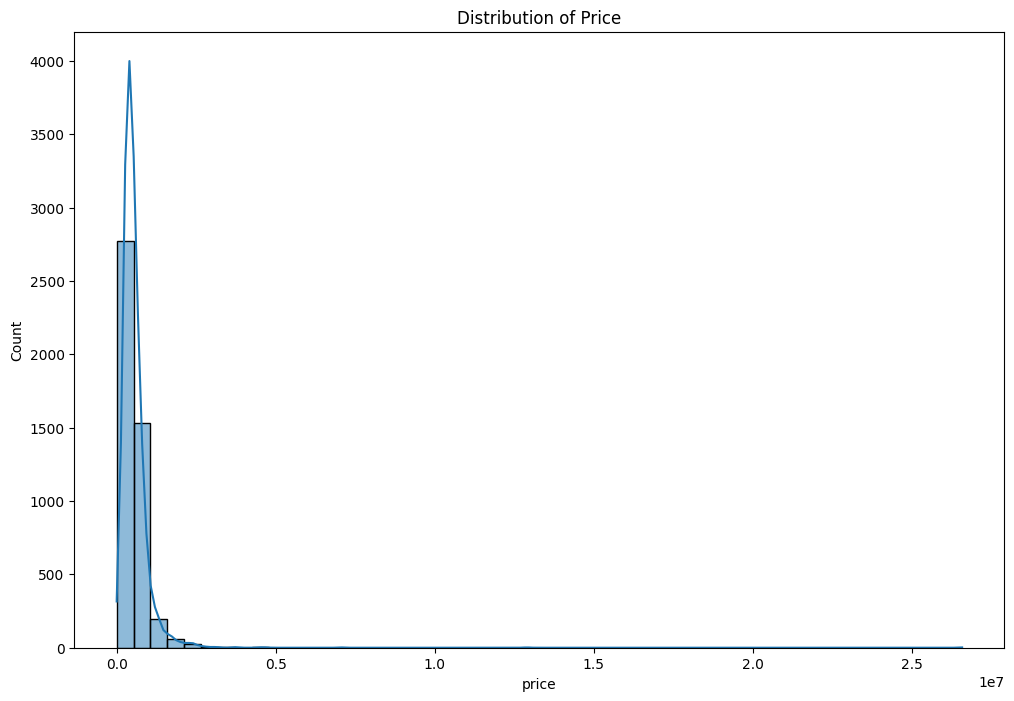

In [10]:
plt.figure(figsize=(12,8))
sns.histplot(df["price"],bins=50,kde=True)
plt.title("Distribution of Price")
plt.show()

Let's plot a heatmap to show the correlation between numerical columns.

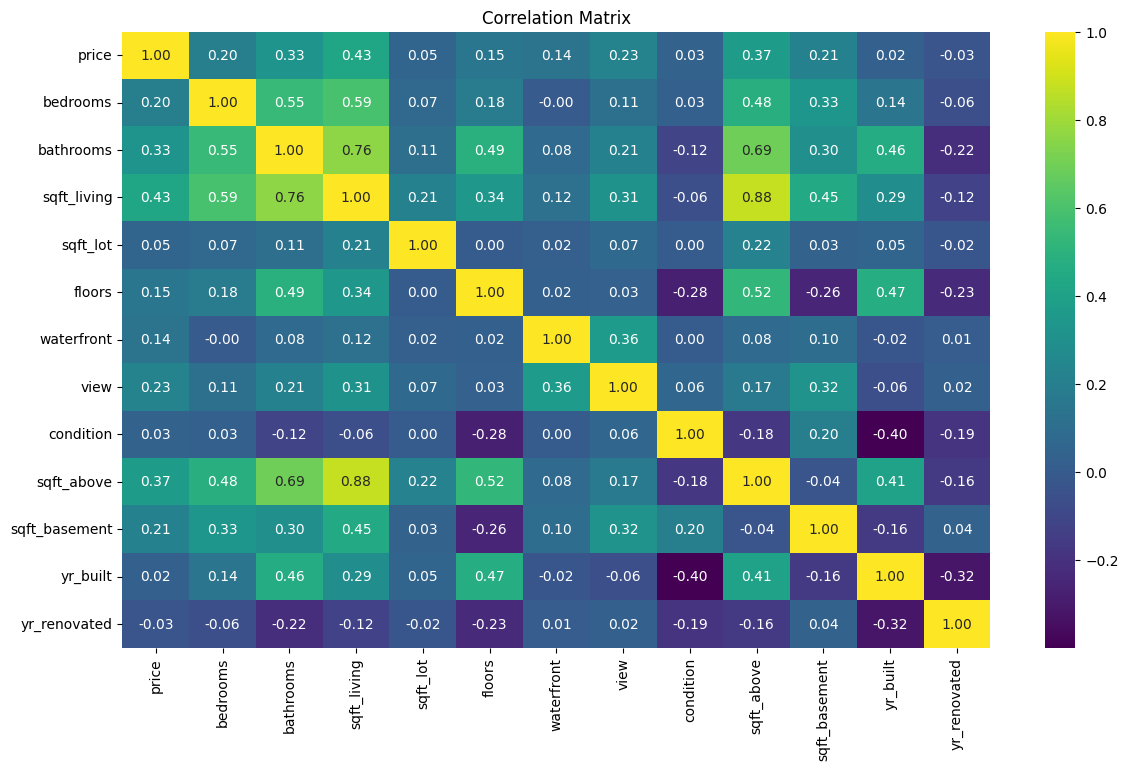

In [11]:
numerical_cols=df.select_dtypes(include=["float64","int64"])
corr_matrix=numerical_cols.corr()

plt.figure(figsize=(14,8))
sns.heatmap(corr_matrix,annot=True,fmt=".2f",cmap="viridis")
plt.title("Correlation Matrix")
plt.show()

There is a weak positive relationship between the number of bedrooms and the house price, suggesting that having more bedrooms is somewhat associated with higher prices. The number of bathrooms shows a slightly stronger positive association with price, indicating a clearer link between additional bathrooms and increased value. The living area displays an even stronger positive correlation with price, meaning larger homes tend to be more expensive. Conversely, the relationship between the year built and the house condition is negative, implying that older homes generally have lower condition ratings.

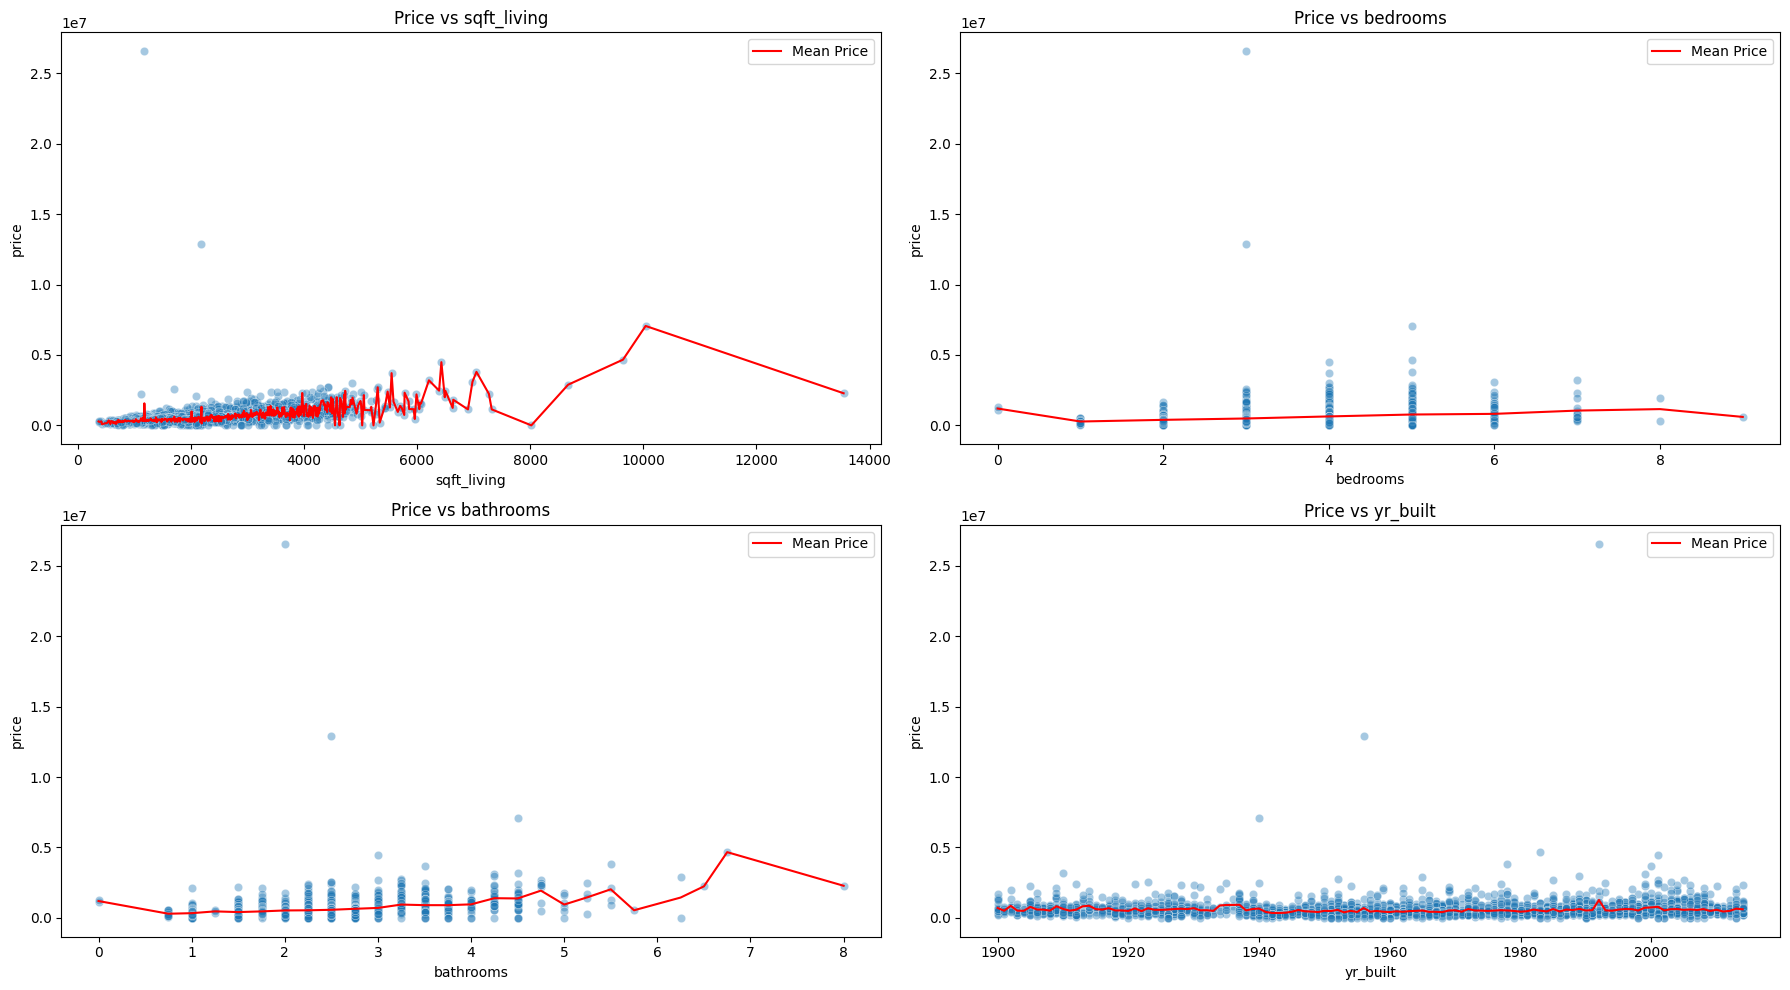

In [12]:
features=["sqft_living","bedrooms","bathrooms","yr_built"]

plt.figure(figsize=(18,10))
for i,feature in enumerate(features):
    plt.subplot(2,2,i+1)
    sns.scatterplot(x=df[feature], y=df["price"], alpha=0.4)
    
    mean_data=df.groupby(feature)["price"].mean().reset_index()
    sns.lineplot(x=mean_data[feature],y=mean_data["price"],color="red",label="Mean Price")

    plt.title(f"Price vs {feature}")
    plt.legend()

plt.tight_layout()    
plt.show()

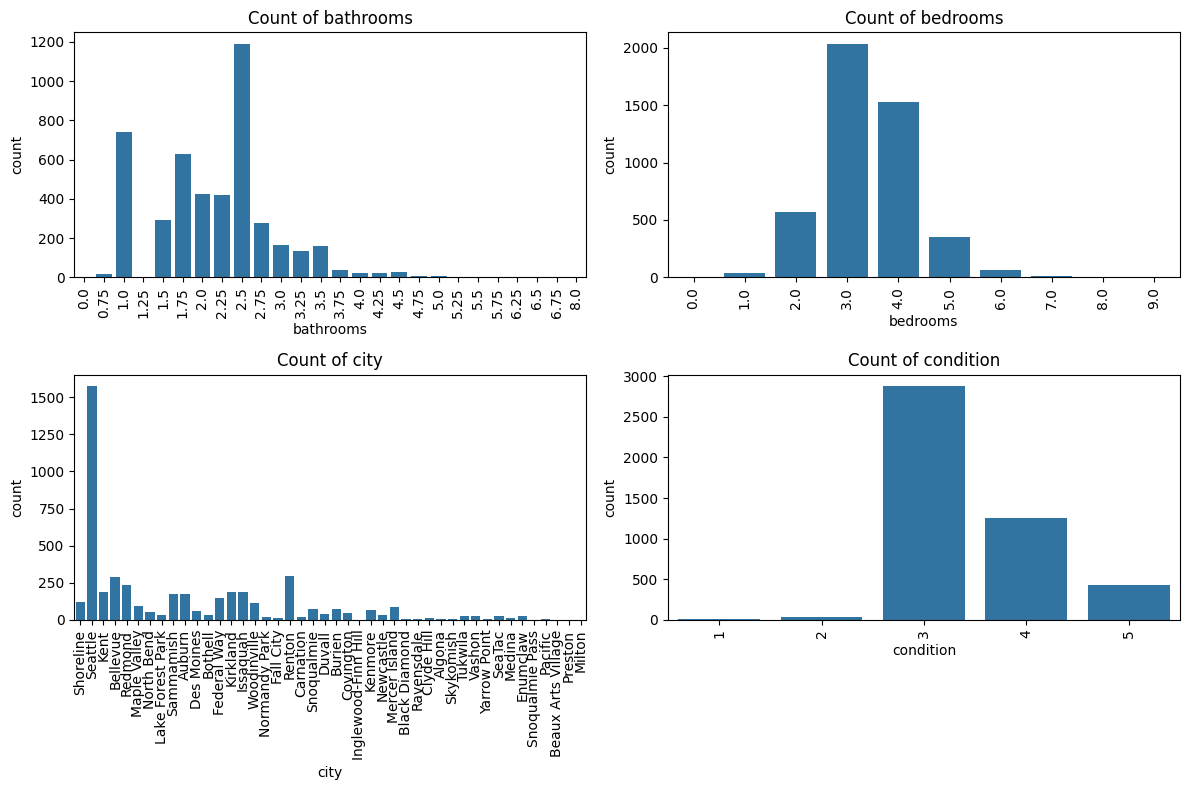

In [13]:
features=["bathrooms","bedrooms","city","condition"]

plt.figure(figsize=(12,8))
for i,feature in enumerate(features):
    plt.subplot(2,2,i+1)
    sns.countplot(x=feature,data=df)
    plt.title(f'Count of {feature}')
    plt.xticks(rotation=90) 

plt.tight_layout()
plt.show()

1. Bathrooms

The majority of houses have between 1.0 and 2.5 bathrooms, with 2.5 being the most common. A small number of houses have more than 4 bathrooms, which suggests that larger or luxury homes are relatively rare.

2. Bedrooms

Most houses have either 3 or 4 bedrooms, with 3 being the most common. Very few houses have more than 5 bedrooms, and a small number have only 1 or 2. This shows that mid-sized homes dominate the dataset.

3. City

The dataset includes houses from many different cities, but the majority of listings are concentrated in a few locations. For example, Seattle and Shoreline have the highest number of houses, while many cities have only a handful of listings. This suggests that the data is not evenly distributed across all cities.

4. Condition

The vast majority of homes are rated as condition 3, followed by condition 4 and 5. Very few houses are rated as 1 or 2, meaning most homes are in average to good condition, and poorly maintained homes are rare in this dataset.

## OUTLIER DETECTION AND REMOVAL

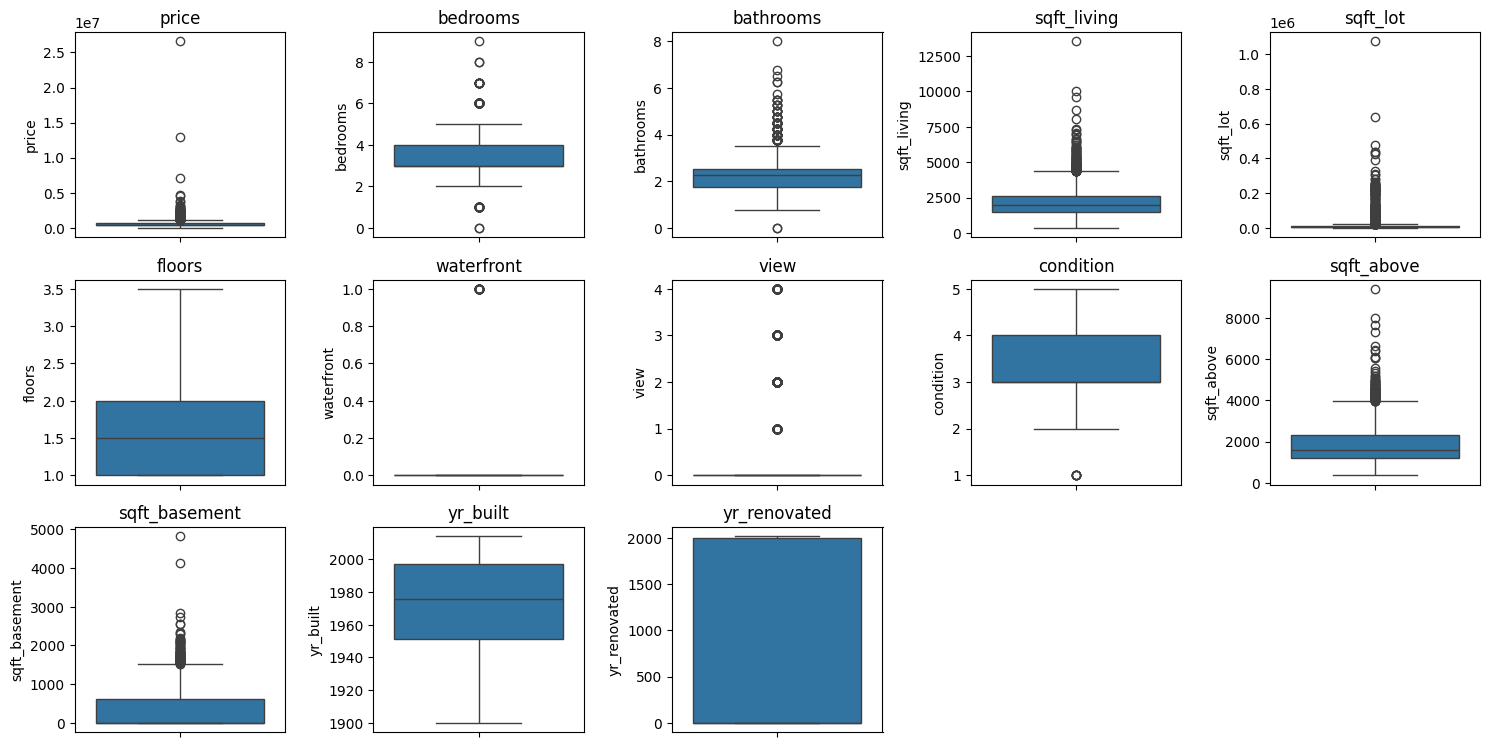

In [14]:
numeric_df=df.select_dtypes(include=["int64","float64"])

plt.figure(figsize=(15,10))
for i,col in enumerate(numeric_df.columns):
    plt.subplot(4,5,i+1)
    sns.boxplot(y=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [15]:
df_cleaned=df.copy()

for col in numeric_df.columns:
    Q1=df_cleaned[col].quantile(0.25)
    Q3=df_cleaned[col].quantile(0.75)
    IQR=Q3-Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

print(f"Original dataset shape: {df.shape}")
print(f"Cleaned dataset shape: {df_cleaned.shape}")

Original dataset shape: (4600, 18)
Cleaned dataset shape: (3316, 18)


numeric_df=df_cleaned.select_dtypes(include=["int64","float64"])

plt.figure(figsize=(15,10))
for i,col in enumerate(numeric_df.columns):
    plt.subplot(4,5,i+1)
    sns.boxplot(y=df_cleaned[col])
    plt.title(col)

plt.tight_layout()
plt.show()


## BUILDING AND TRAINING MODEL

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# 1. Your dataset
df = df_cleaned.copy()

# 2. Drop irrelevant columns if needed (optional)
df.drop(['date', 'country'], axis=1, inplace=True)

# 3. Identify features and target
X = df.drop('price', axis=1)     # features
y = df['price']                  # target

# 4. Identify column types
categorical_cols = ['city', 'street', 'statezip']
numerical_cols = [col for col in X.columns if col not in categorical_cols]

# 5. Create a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numerical_cols)
    ]
)

# 6. Apply transformation
X_processed = preprocessor.fit_transform(X)

# 7. Now you can split or use X_processed in your model
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)
X_processed

array([[ 0.        ,  0.        ,  0.        , ..., -0.66026238,
        -0.5082374 ,  1.22081343],
       [ 0.        ,  0.        ,  0.        , ..., -0.66026238,
        -0.14477367, -0.82650447],
       [ 0.        ,  0.        ,  0.        , ...,  2.15430216,
        -0.24390014, -0.82650447],
       ...,
       [ 0.        ,  0.        ,  0.        , ..., -0.66026238,
         1.27603908, -0.82650447],
       [ 0.        ,  0.        ,  0.        , ...,  2.21059345,
         0.11956358, -0.82650447],
       [ 0.        ,  0.        ,  0.        , ..., -0.66026238,
         0.64823809, -0.82650447]], shape=(3316, 3390))

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

models = {
    "Linear Regressor": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
}


for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)
    print(f"{name} Results:")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R2 Score: {r2:.2f}")
    print()

Linear Regressor Results:
  RMSE: 114887.26
  R2 Score: 0.65

Decision Tree Results:
  RMSE: 128977.27
  R2 Score: 0.56

Random Forest Results:
  RMSE: 96222.26
  R2 Score: 0.76

Gradient Boosting Results:
  RMSE: 100261.70
  R2 Score: 0.74

XGBoost Results:
  RMSE: 92284.10
  R2 Score: 0.78



In [25]:
xgb = XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
xgb.fit(X_train, y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [26]:
xgb.score(X_test, y_test)

0.7767375606874303

In [21]:
import json
cities = sorted(X["city"].dropna().unique().tolist())
streets = sorted(X["street"].dropna().unique().tolist())
state_zips = sorted(X["statezip"].dropna().unique().tolist())

# Save each to a JSON file
with open("cities.json", "w") as f:
    json.dump(cities, f)

with open("streets.json", "w") as f:
    json.dump(streets, f)

with open("state_zips.json", "w") as f:
    json.dump(state_zips, f)

In [24]:
import pickle

In [28]:
with open("model_pkl", "wb") as f:
    pickle.dump(xgb, f)

with open("preprocessor.pkl", "wb") as f1:
    pickle.dump(preprocessor, f1)


In [29]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133
2,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042
3,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008
4,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052
5,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133
4596,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007
4597,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059
4598,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178
